In [4]:
from schmeud import qlm
import gsd.hoomd

import matplotlib.pyplot as plt

import numpy as np
import itertools

import matplotlib
from matplotlib.collections import PatchCollection
import matplotlib.patches

In [12]:
def show_2d_packing(snap):

    fig, ax = plt.subplots()

    patch_list = []
    for v in snap.particles.position:
        patch_list.append(matplotlib.patches.Circle(v, radius=0.7, alpha=0.5))
    p = PatchCollection(patch_list, match_original=True)
    ax.add_collection(p)

    box = snap.configuration.box
    Lx = box[0]
    Ly = box[1]
    ax.set_xlim(-Lx/2, Lx/2)
    ax.set_ylim(-Ly/2, Ly/2)

In [14]:


pair = qlm.BidispHertz()
qlm_comp = qlm.QLM(pair)

# snap = gsd.hoomd.open("/")

snap = gsd.hoomd.Snapshot()
Nx = 50
points = np.linspace(-Nx/2, Nx/2, Nx, endpoint=False)
pos_xy = list(itertools.product(points, points))
pos = np.zeros((len(pos_xy), 3))
pos[:, :2 ] = np.array(pos_xy)
pos[:, :2] -= 1
snap.particles.position = pos
snap.particles.N = len(snap.particles.position)
snap.configuration.dimensions = 2
snap.configuration.box = [Nx,Nx,0,0,0,0]
snap.particles.types = ["A"]
snap.particles.typeid = np.zeros(len(snap.particles.position), dtype=int)

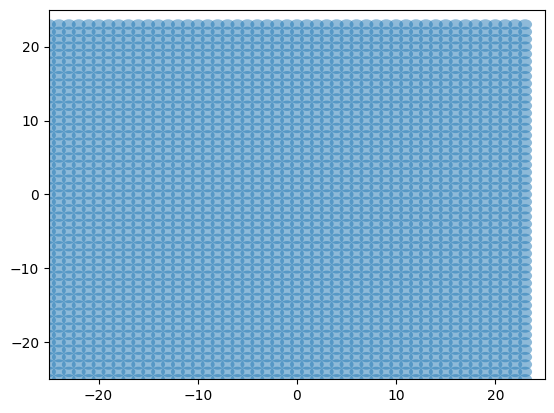

In [15]:
show_2d_packing(snap)

In [28]:
snap.particles.N

2500

In [29]:
eig_vals, eig_vecs, hessian = qlm_comp.compute(snap, k=250, filter=False, sigma=None)

In [30]:
hessian.shape

(5000, 5000)

In [17]:
print(hessian[:4, :4])

[[-0.24983877  0.          0.12491937  0.        ]
 [ 0.         -0.24983877  0.          0.        ]
 [ 0.12491937  0.         -0.24983874  0.        ]
 [ 0.          0.          0.         -0.24983877]]


In [5]:
class Packing:
    """Compute"""

    def __init__(self, snapshot: gsd.hoomd.Snapshot):
        self._snapshot = snapshot

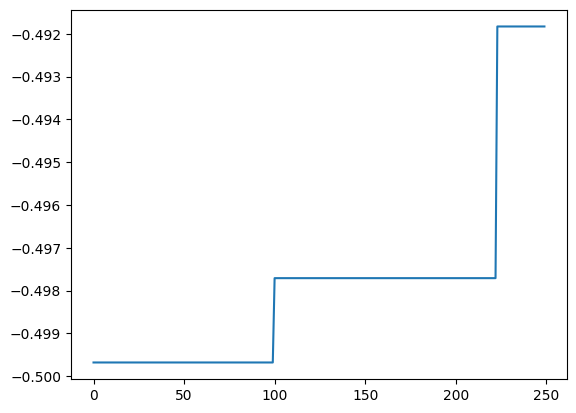

In [31]:
plt.plot(eig_vals)

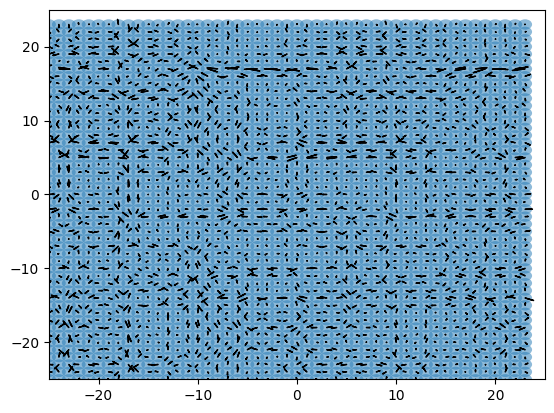

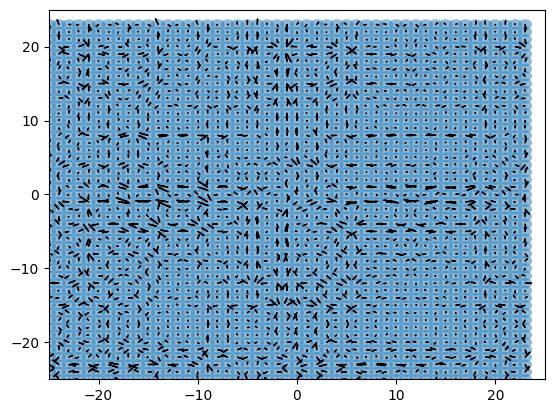

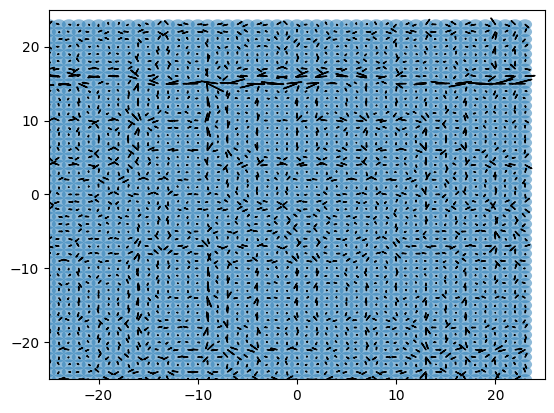

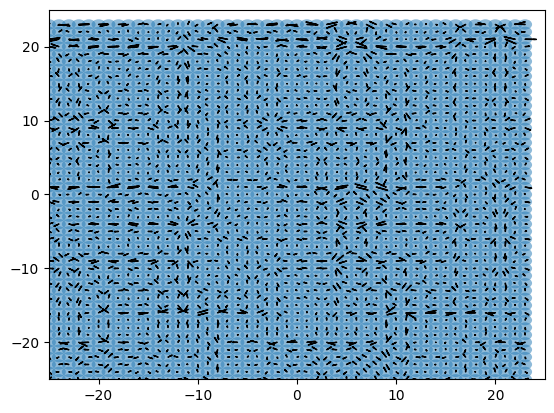

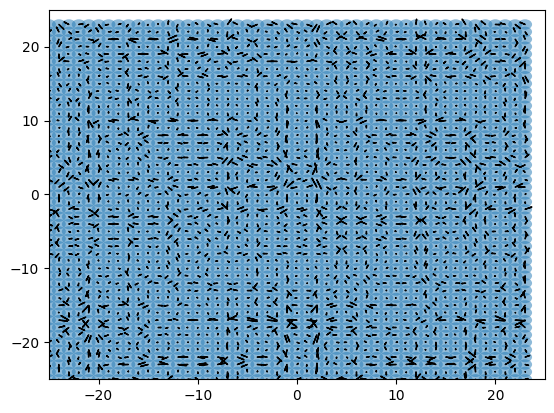

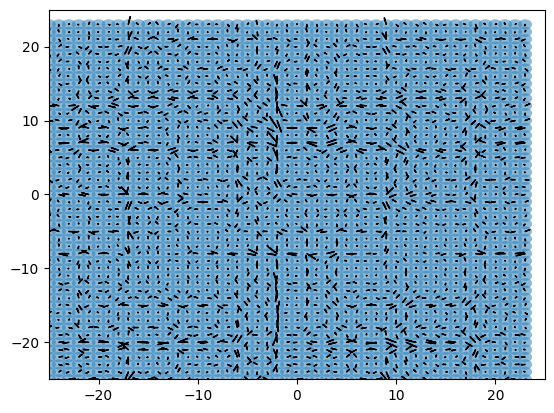

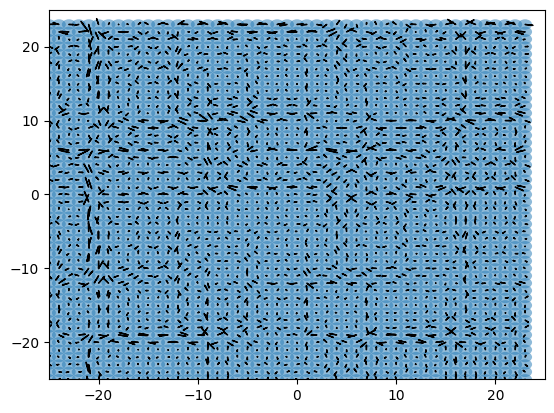

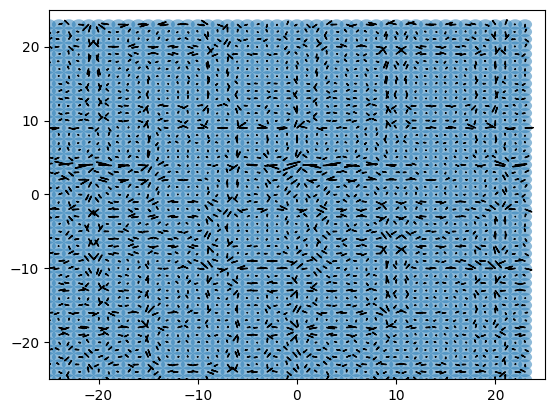

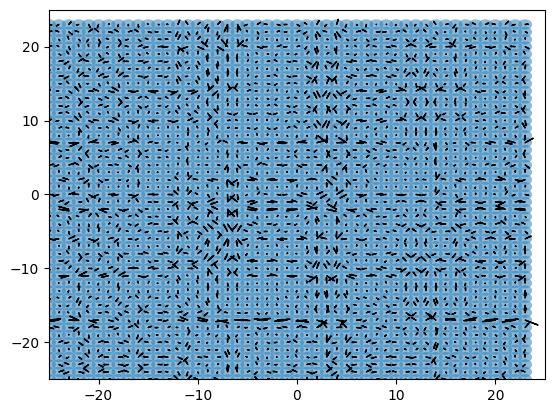

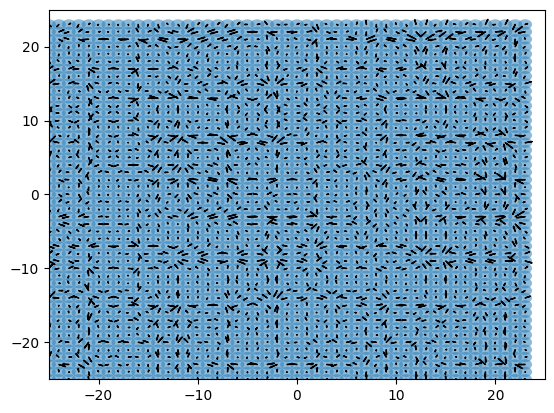

In [32]:
scale = 25

for vec in eig_vecs[100:110]:
    vec = vec.reshape(len(vec)//2, 2)
    fig, ax = plt.subplots()

    patch_list = []
    arrow_list = []
    for v, dv in zip(pos, vec):
        patch_list.append(matplotlib.patches.Circle(v, radius=0.7, alpha=0.5))
        arrow_list.append(matplotlib.patches.Arrow(v[0], v[1], scale*dv[0], scale*dv[1], width=0.1, color='k'))
    p = PatchCollection(patch_list, match_original=True)
    ax.add_collection(p)
    p = PatchCollection(arrow_list, match_original=True)
    ax.add_collection(p)
    plt.ylim(-Nx/2, Nx/2)
    plt.xlim(-Nx/2, Nx/2)
    # break